In [1]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

/home/dkyun77/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)

In [3]:
X,y = shap.datasets.imagenet50()

In [4]:
# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

In [7]:
# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

In [9]:
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)

In [18]:
to_explain = X[[20,24]]

In [27]:
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=3)

In [29]:
print(indexes)

[[928 925 809]
 [ 32  30  31]]


In [30]:
print(shap_values)

[array([[[[ 3.44055430e-05, -4.76249674e-06,  5.49927181e-06, ...,
           2.13884269e-06, -3.47066847e-05, -2.57159884e-06],
         [ 2.52776306e-05,  2.09908414e-06,  6.12566535e-06, ...,
          -2.25268068e-05, -2.56297633e-05, -1.09090503e-05],
         [ 5.99497301e-06,  6.82468906e-06,  9.86257510e-06, ...,
          -3.98146439e-07, -4.01562578e-05, -1.31437206e-06],
         ...,
         [ 1.05696579e-05, -6.63730345e-06, -8.63314928e-06, ...,
          -2.19989886e-05,  4.57406654e-05,  6.88627967e-05],
         [ 1.59092664e-05,  1.55381477e-06, -1.31669641e-05, ...,
           1.59053610e-05,  2.80682968e-05,  5.62434591e-05],
         [ 9.67038123e-06,  1.41812794e-05,  2.12278155e-06, ...,
           1.38381032e-05,  1.86785633e-05,  1.97650320e-05]],

        [[ 2.87742681e-05,  2.61078565e-05, -5.75564510e-06, ...,
          -2.91386645e-06, -1.86801797e-06, -6.51516022e-06],
         [ 3.75365701e-05,  1.15429056e-05, -3.51109188e-05, ...,
          -3.55752970

In [31]:
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

In [32]:
print(index_names)

[['ice_cream' 'consomme' 'soup_bowl']
 ['tailed_frog' 'bullfrog' 'tree_frog']]


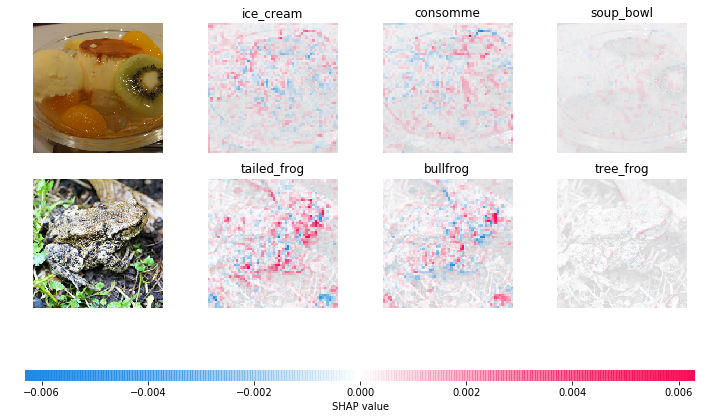

In [33]:
# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)